<a href="https://colab.research.google.com/github/srujanaayy/FinalProject/blob/main/MLProjectLinearCovidData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOAL: using the patient's medical history and demographic, train a model to classify patients into different severity levels or inconclusive based on their features


target variable: classification_final


1 means TRUE

2 means FALSE

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#data1 = pd.read_csv('/content/drive/MyDrive/Covid Data (2).csv')
data = pd.read_csv('/content/drive/MyDrive/Covid Data 2.csv')

In [ ]:
df = data.copy()

In [ ]:
print(data.head(5))

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1      3/5/20      NaN        1.0   
1      2             1    2             1      3/6/20      NaN        1.0   
2      2             1    2             2      9/6/20      1.0        2.0   
3      2             1    1             1     12/6/20      NaN        2.0   
4      2             1    2             1  21/06/2020      NaN        2.0   

   AGE  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0   65       2.0       2.0   2.0     2.0      2.0           1.0   
1   72       NaN       2.0   2.0     2.0      2.0           1.0   
2   55       NaN       1.0   2.0     2.0      2.0           2.0   
3   53       2.0       2.0   2.0     2.0      2.0           2.0   
4   68       NaN       1.0   2.0     2.0      2.0           1.0   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0            2.0             2.0      2.0            2.0      2.0

In [ ]:
data.shape

(1048575, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             76942 non-null    object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048575 non-null  int64  
 8   PREGNANT              521310 non-null   float64
 9   DIABETES              1045237 non-null  float64
 10  COPD                  1045572 non-null  float64
 11  ASTHMA                1045596 non-null  float64
 12  INMSUPR               1045171 non-null  float64
 13  HIPERTENSION          1045471 non-null  float64
 14  OTHER_DISEASE         1043530 non-

In [ ]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

Observations about the dataset:

USMER: treated medical units of the first, second, or third level

Medical_unit: type of institution of the national health system that provided care

sex: 1 for female 2 for male

patient_type:

  1: returned home
  2: hospitalized

date died: 9999-99-99

intubed: intubated or not

pneuomonia

age: numerical age

pregnant: pregnant or not

diabetes: has diabetes or not

copd: chronic obstructive pulmonary disease or not

asthma: is asthmatic or not

imnsupr: is immunosupressed or not

hypertension: is hypertensive or not

other disease: whether the patient has other diseases or no

cardiovascular: patient has cardiovascular disease

obesity: is obsese or not

renal: has renal disease or not

tobacco: uses tobacco or no

classification_final:

  1: covid with degree 1

  2: covid degree 2

  3: covid degree 3

  4+: not a carrier of covid, inconclusive

icu: has been admitted to icu or no

In [ ]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,3/5/20,NaN,1.0,65,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,3/6/20,NaN,1.0,72,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,9/6/20,1.0,2.0,55,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,12/6/20,NaN,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,21/06/2020,NaN,2.0,68,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


In [ ]:
df.describe(include = 'all').T
#is medical_unit useful?

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
USMER,1048575.0,NaN,NaN,NaN,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,NaN,NaN,NaN,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,NaN,NaN,NaN,1.499259,0.5,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,NaN,NaN,NaN,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
DATE_DIED,76942,400,6/7/20,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INTUBED,192706.0,NaN,NaN,NaN,1.825351,0.379668,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1032572.0,NaN,NaN,NaN,1.864379,0.342385,1.0,2.0,2.0,2.0,2.0
AGE,1048575.0,NaN,NaN,NaN,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,521310.0,NaN,NaN,NaN,1.984403,0.123911,1.0,2.0,2.0,2.0,2.0
DIABETES,1045237.0,NaN,NaN,NaN,1.88042,0.324469,1.0,2.0,2.0,2.0,2.0


In [ ]:
data.drop(['MEDICAL_UNIT'],axis=1,inplace=True)

In [ ]:
#data.drop(['USMER'],axis=1,inplace = True)

In [ ]:
data.shape

(1048575, 20)

In [ ]:
#check sum of null vals in each col
data.isna().sum()

USMER                        0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                 855869
PNEUMONIA                16003
AGE                          0
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

In [ ]:
#remove null vals in cols of type object
#data.dropna(axis=0,subset=['DATE_DIED','PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO','ICU'],inplace=True)

In [ ]:
#filling in NULL vals
data.INTUBED.fillna(2,inplace=True)
data.PNEUMONIA.fillna(2,inplace=True)
data.PREGNANT.fillna(2,inplace=True)
data.DIABETES.fillna(2,inplace=True)
data.COPD.fillna(2,inplace=True)
data.ASTHMA.fillna(2,inplace=True)
data.INMSUPR.fillna(2,inplace=True)
data.HIPERTENSION.fillna(2,inplace=True)
data.OTHER_DISEASE.fillna(2,inplace=True)
data.CARDIOVASCULAR.fillna(2,inplace=True)
data.OBESITY.fillna(2,inplace=True)
data.RENAL_CHRONIC.fillna(2,inplace=True)
data.TOBACCO.fillna(2,inplace=True)
data.ICU.fillna(2,inplace=True)



In [ ]:
data['CLASIFFICATION_FINAL']= data['CLASIFFICATION_FINAL'].apply(lambda x:4 if x > 4  else x)

dont run the cell bel

In [ ]:
#data['DATE_DIED']= pd.to_datetime(data['DATE_DIED'],errors='coerce')

In [ ]:
data.head()

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,3/5/20,2.0,1.0,65,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0
1,2,2,1,3/6/20,2.0,1.0,72,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,4,2.0
2,2,2,2,9/6/20,1.0,2.0,55,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,12/6/20,2.0,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4,2.0
4,2,2,1,21/06/2020,2.0,2.0,68,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0


In [ ]:
data.isna().sum()

USMER                        0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                      0
PNEUMONIA                    0
AGE                          0
PREGNANT                     0
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                          0
dtype: int64

In [ ]:
data.shape

(1048575, 20)

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
USMER,1048575.0,NaN,NaN,NaN,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
SEX,1048575.0,NaN,NaN,NaN,1.499259,0.5,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,NaN,NaN,NaN,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
DATE_DIED,76942,400,6/7/20,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INTUBED,1048575.0,NaN,NaN,NaN,1.967903,0.176258,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1048575.0,NaN,NaN,NaN,1.866449,0.340169,1.0,2.0,2.0,2.0,2.0
AGE,1048575.0,NaN,NaN,NaN,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,NaN,NaN,NaN,1.992246,0.087717,1.0,2.0,2.0,2.0,2.0
DIABETES,1048575.0,NaN,NaN,NaN,1.880801,0.324023,1.0,2.0,2.0,2.0,2.0
COPD,1048575.0,NaN,NaN,NaN,1.985636,0.118987,1.0,2.0,2.0,2.0,2.0


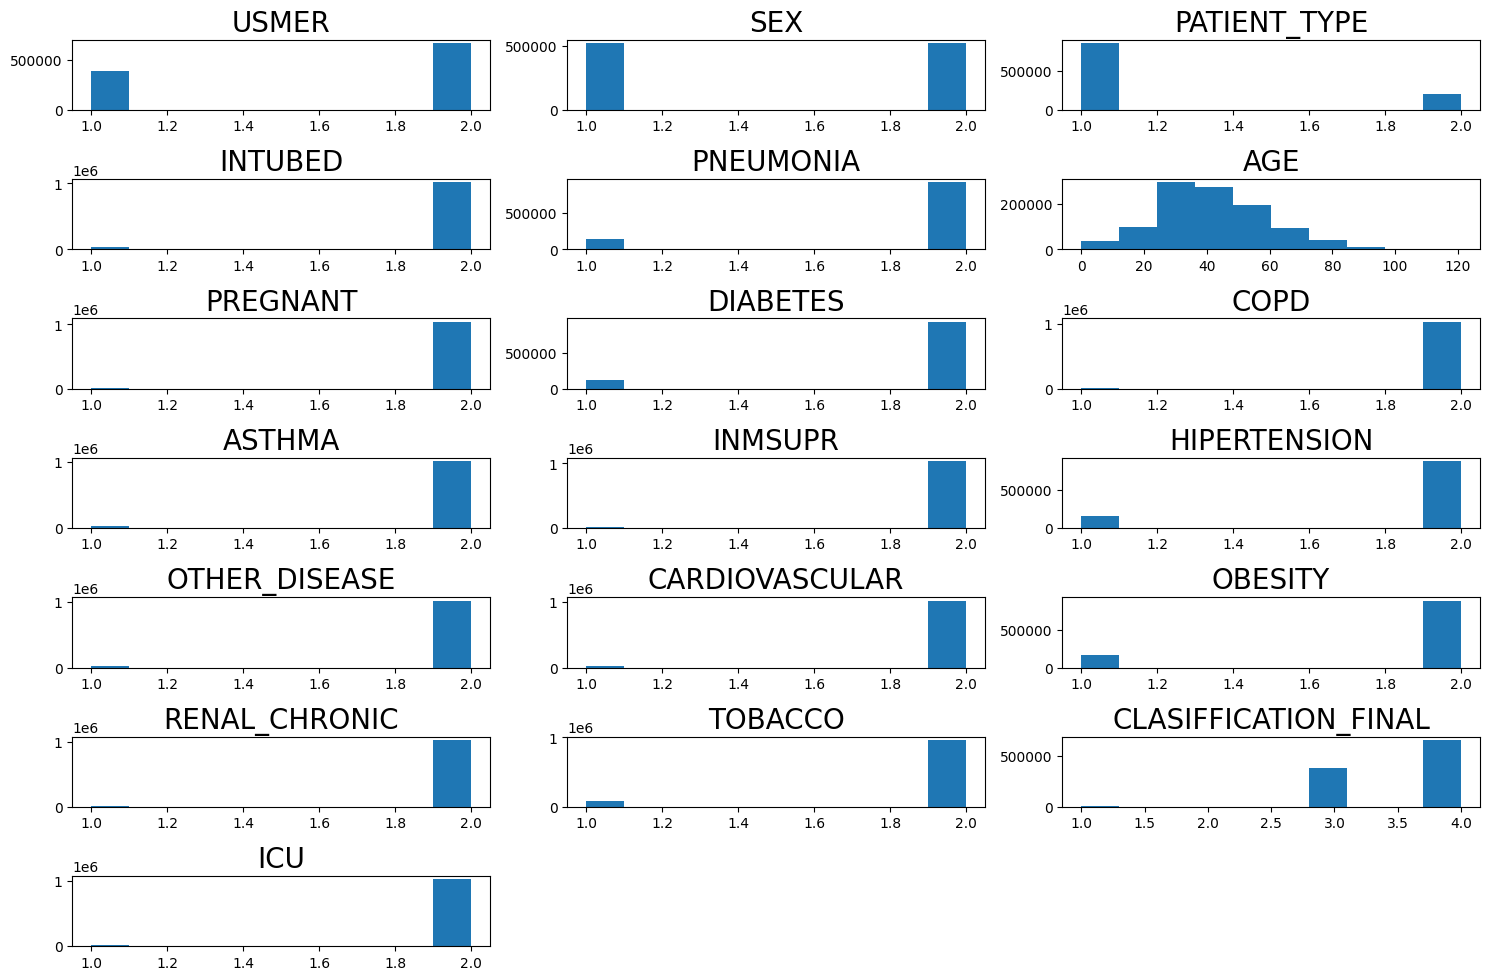

In [ ]:
#start univariate analysis
# histogram
num_cols = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,25))
for i in range(len(num_cols)):
  plt.subplot(18,3,i+1)
  plt.hist(data[num_cols[i]])
  plt.tight_layout()
  plt.title(num_cols[i],fontsize=20)

plt.show()

plot categorical variables

In [ ]:
#plot all categorical variables THERE ARE 17 ( not including date)

'''

plt.subplot(1,2,1)
sns.countplot(data['ASTHMA'])
plt.xlabel('Asthma')

plt.subplot(1,2,2)
sns.countplot(data['CARDIOVASCULAR'])
plt.xlabel('Cardiovascular disease')

plt.subplot(1,2,3)
sns.countplot(data['COPD'])
plt.xlabel('COPD')

plt.show()
'''


"\n\nplt.subplot(1,2,1)\nsns.countplot(data['ASTHMA'])\nplt.xlabel('Asthma')\n\nplt.subplot(1,2,2)\nsns.countplot(data['CARDIOVASCULAR'])\nplt.xlabel('Cardiovascular disease')\n\nplt.subplot(1,2,3)\nsns.countplot(data['COPD'])\nplt.xlabel('COPD')\n\nplt.show()\n"

IndexError: index 18 is out of bounds for axis 0 with size 18

<Figure size 2000x2500 with 0 Axes>

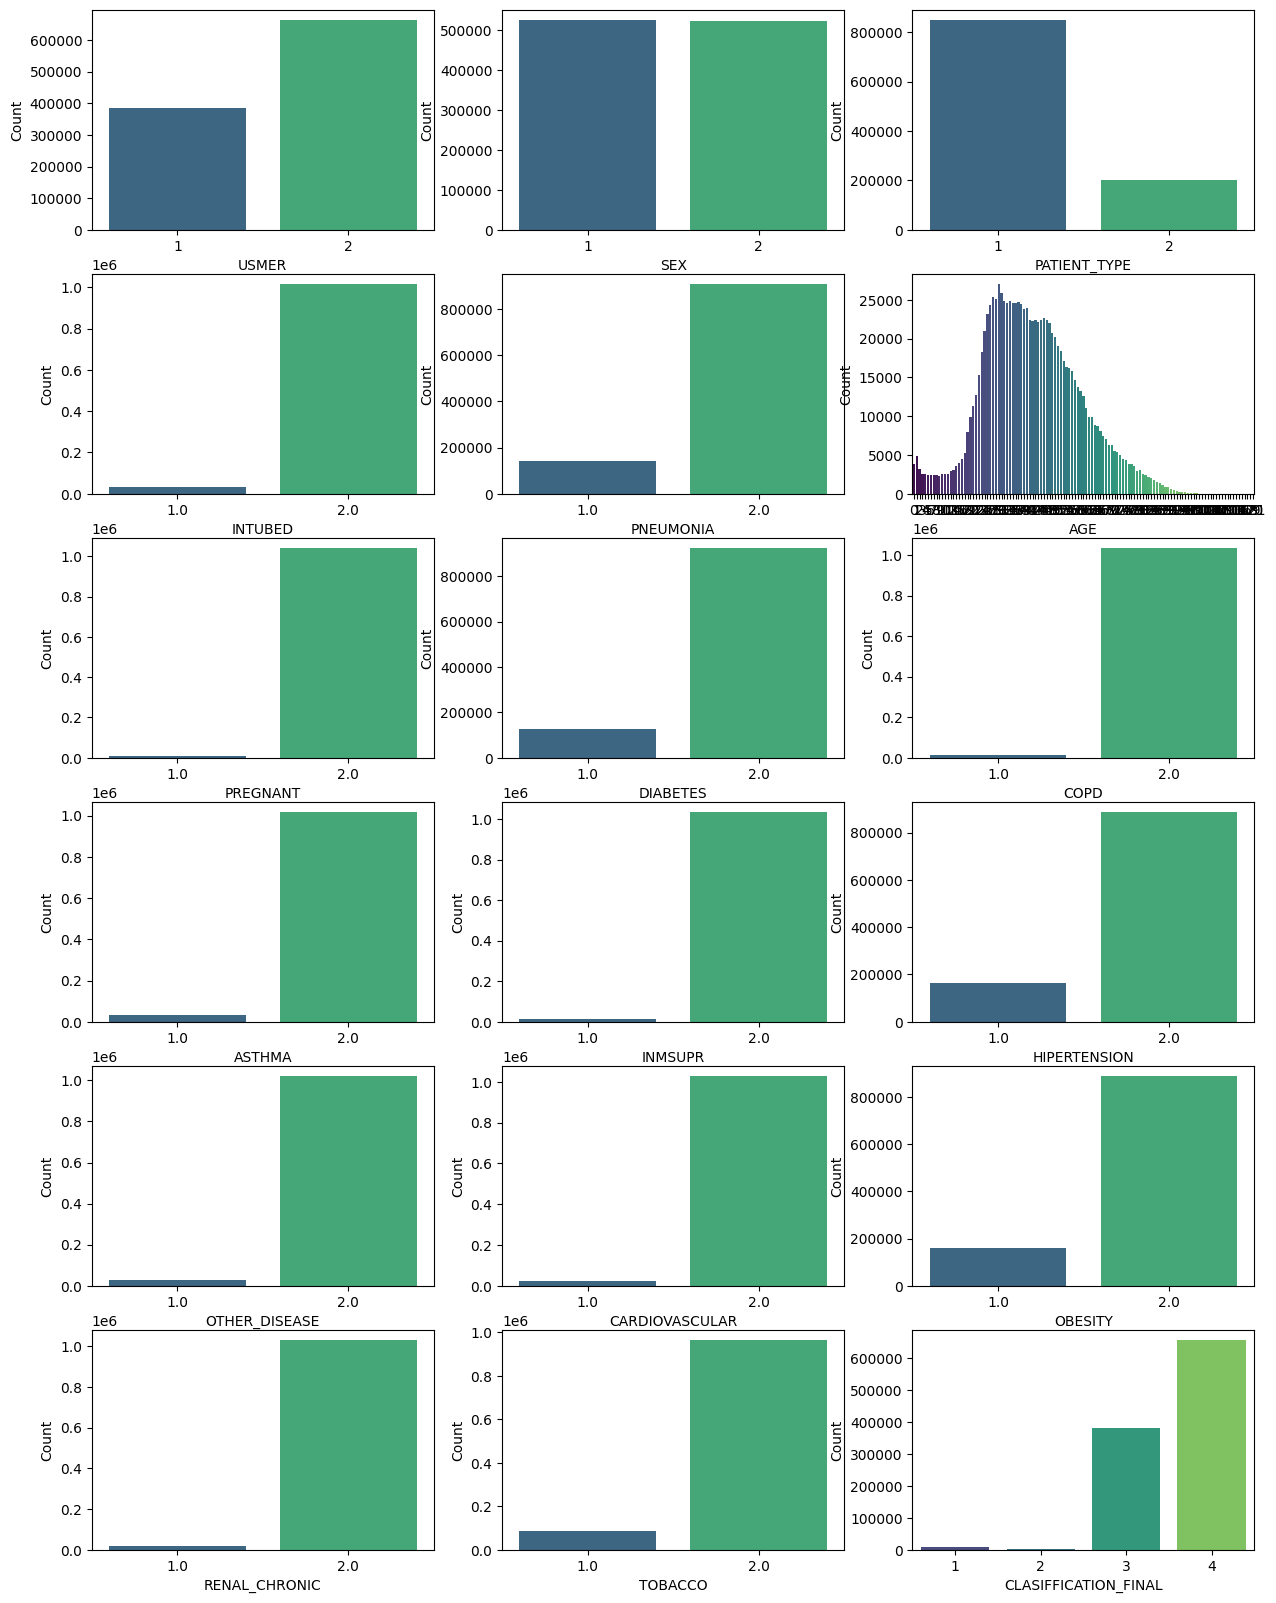

In [ ]:
plt.figure(figsize=(20,25))
fig,axes= plt.subplots(6,3,figsize=(15,20))
axes= axes.flatten()
for i, col in enumerate(num_cols):
  counts=data[col].value_counts()
  sns.countplot(x=col,data=data,ax=axes[i],palette='viridis')
  #axes[i-1].set_title(f'Countplot of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


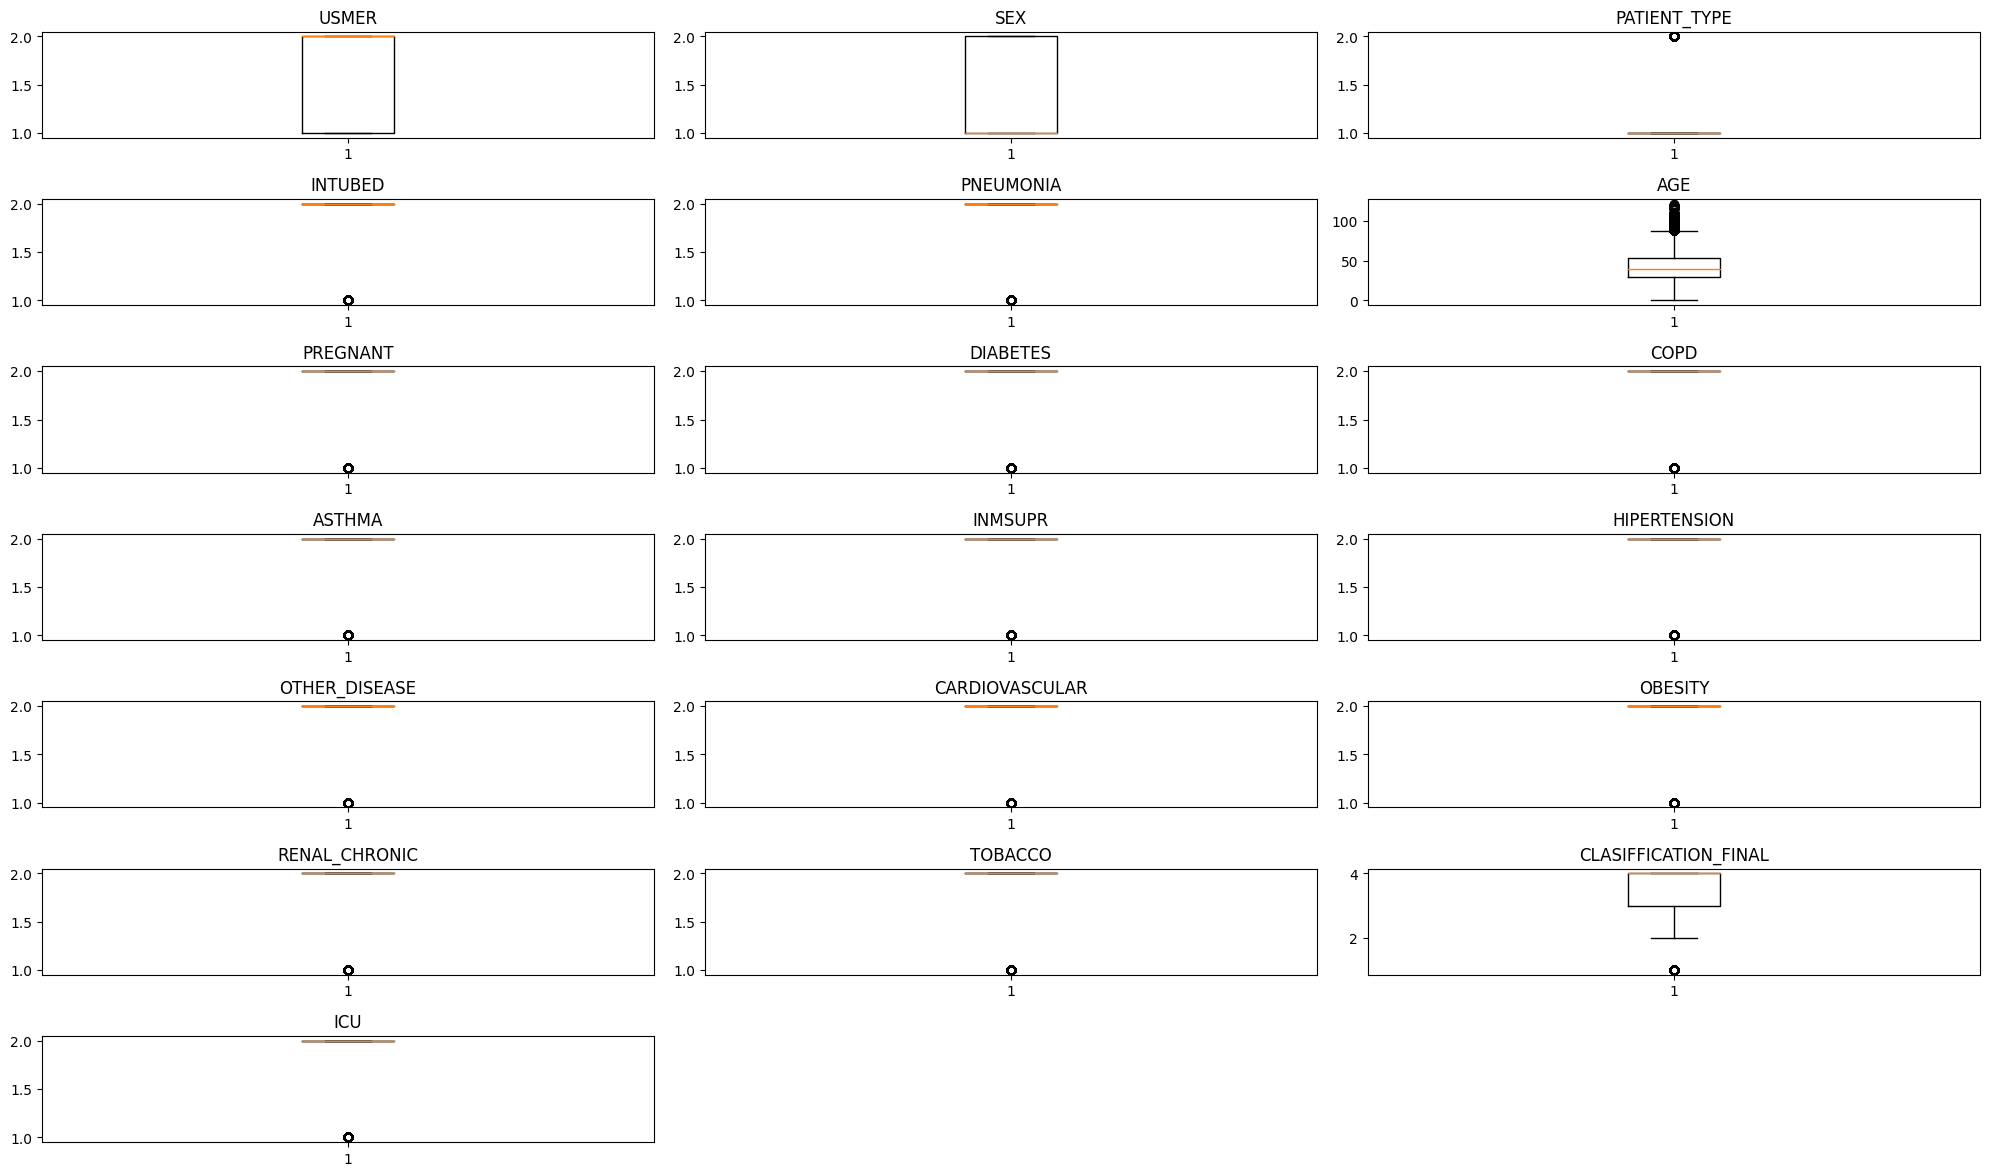

In [ ]:
#outlier detection using boxplots
plt.figure(figsize=(20,20))

for i, variable in enumerate(num_cols):
  plt.subplot(12,3,i+1)
  plt.boxplot(data[variable],vert=True)
  plt.tight_layout()
  plt.title(variable)

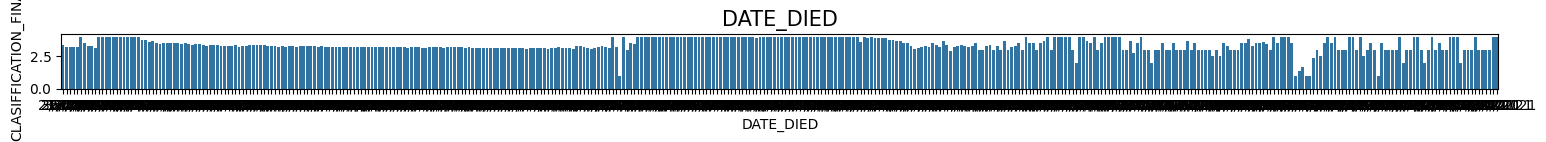

In [ ]:
#multivariate analysis

plt.figure(figsize=(45,20))
obj_col = data.select_dtypes(include =object).columns.tolist()
for i in range(len(obj_col)):
  plt.subplot(18,3,i+1)
  sns.barplot(x=obj_col[i], y= data['CLASIFFICATION_FINAL'],data=data,ci=None)
  plt.tight_layout()
  plt.title(obj_col[i],fontsize=15)
plt.show()

THERE are no categorical variables !! so the above multivariate analysis printed nothing


<Axes: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

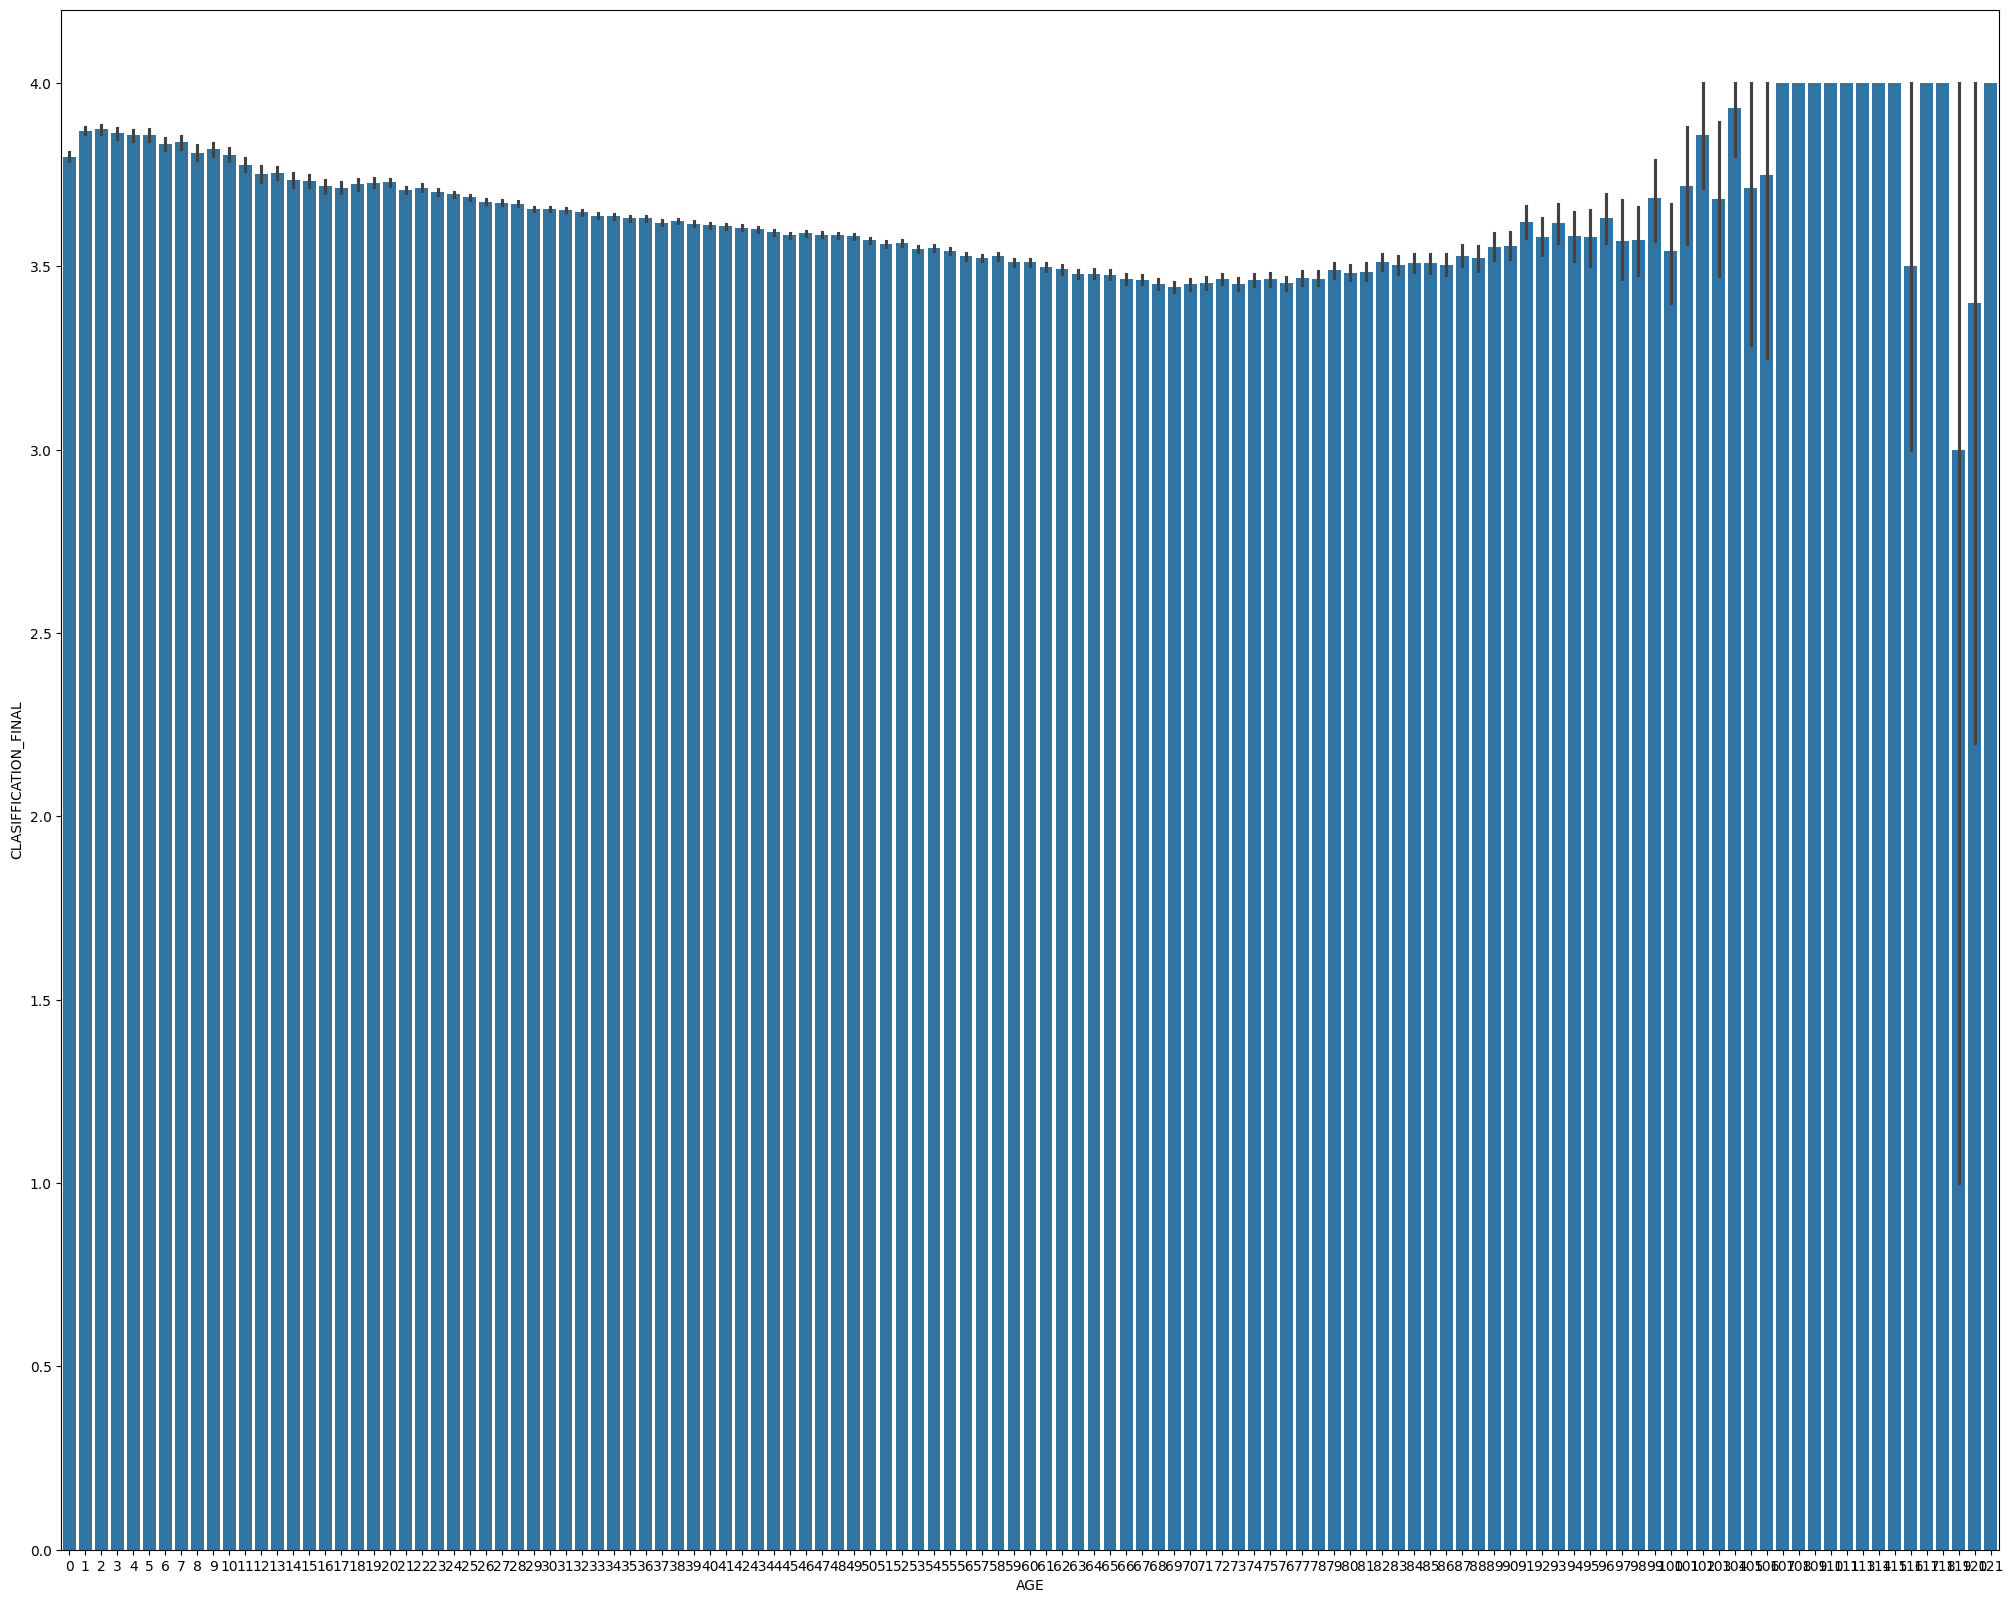

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='AGE',y='CLASIFFICATION_FINAL', data=data)

<Axes: xlabel='SEX', ylabel='CLASIFFICATION_FINAL'>

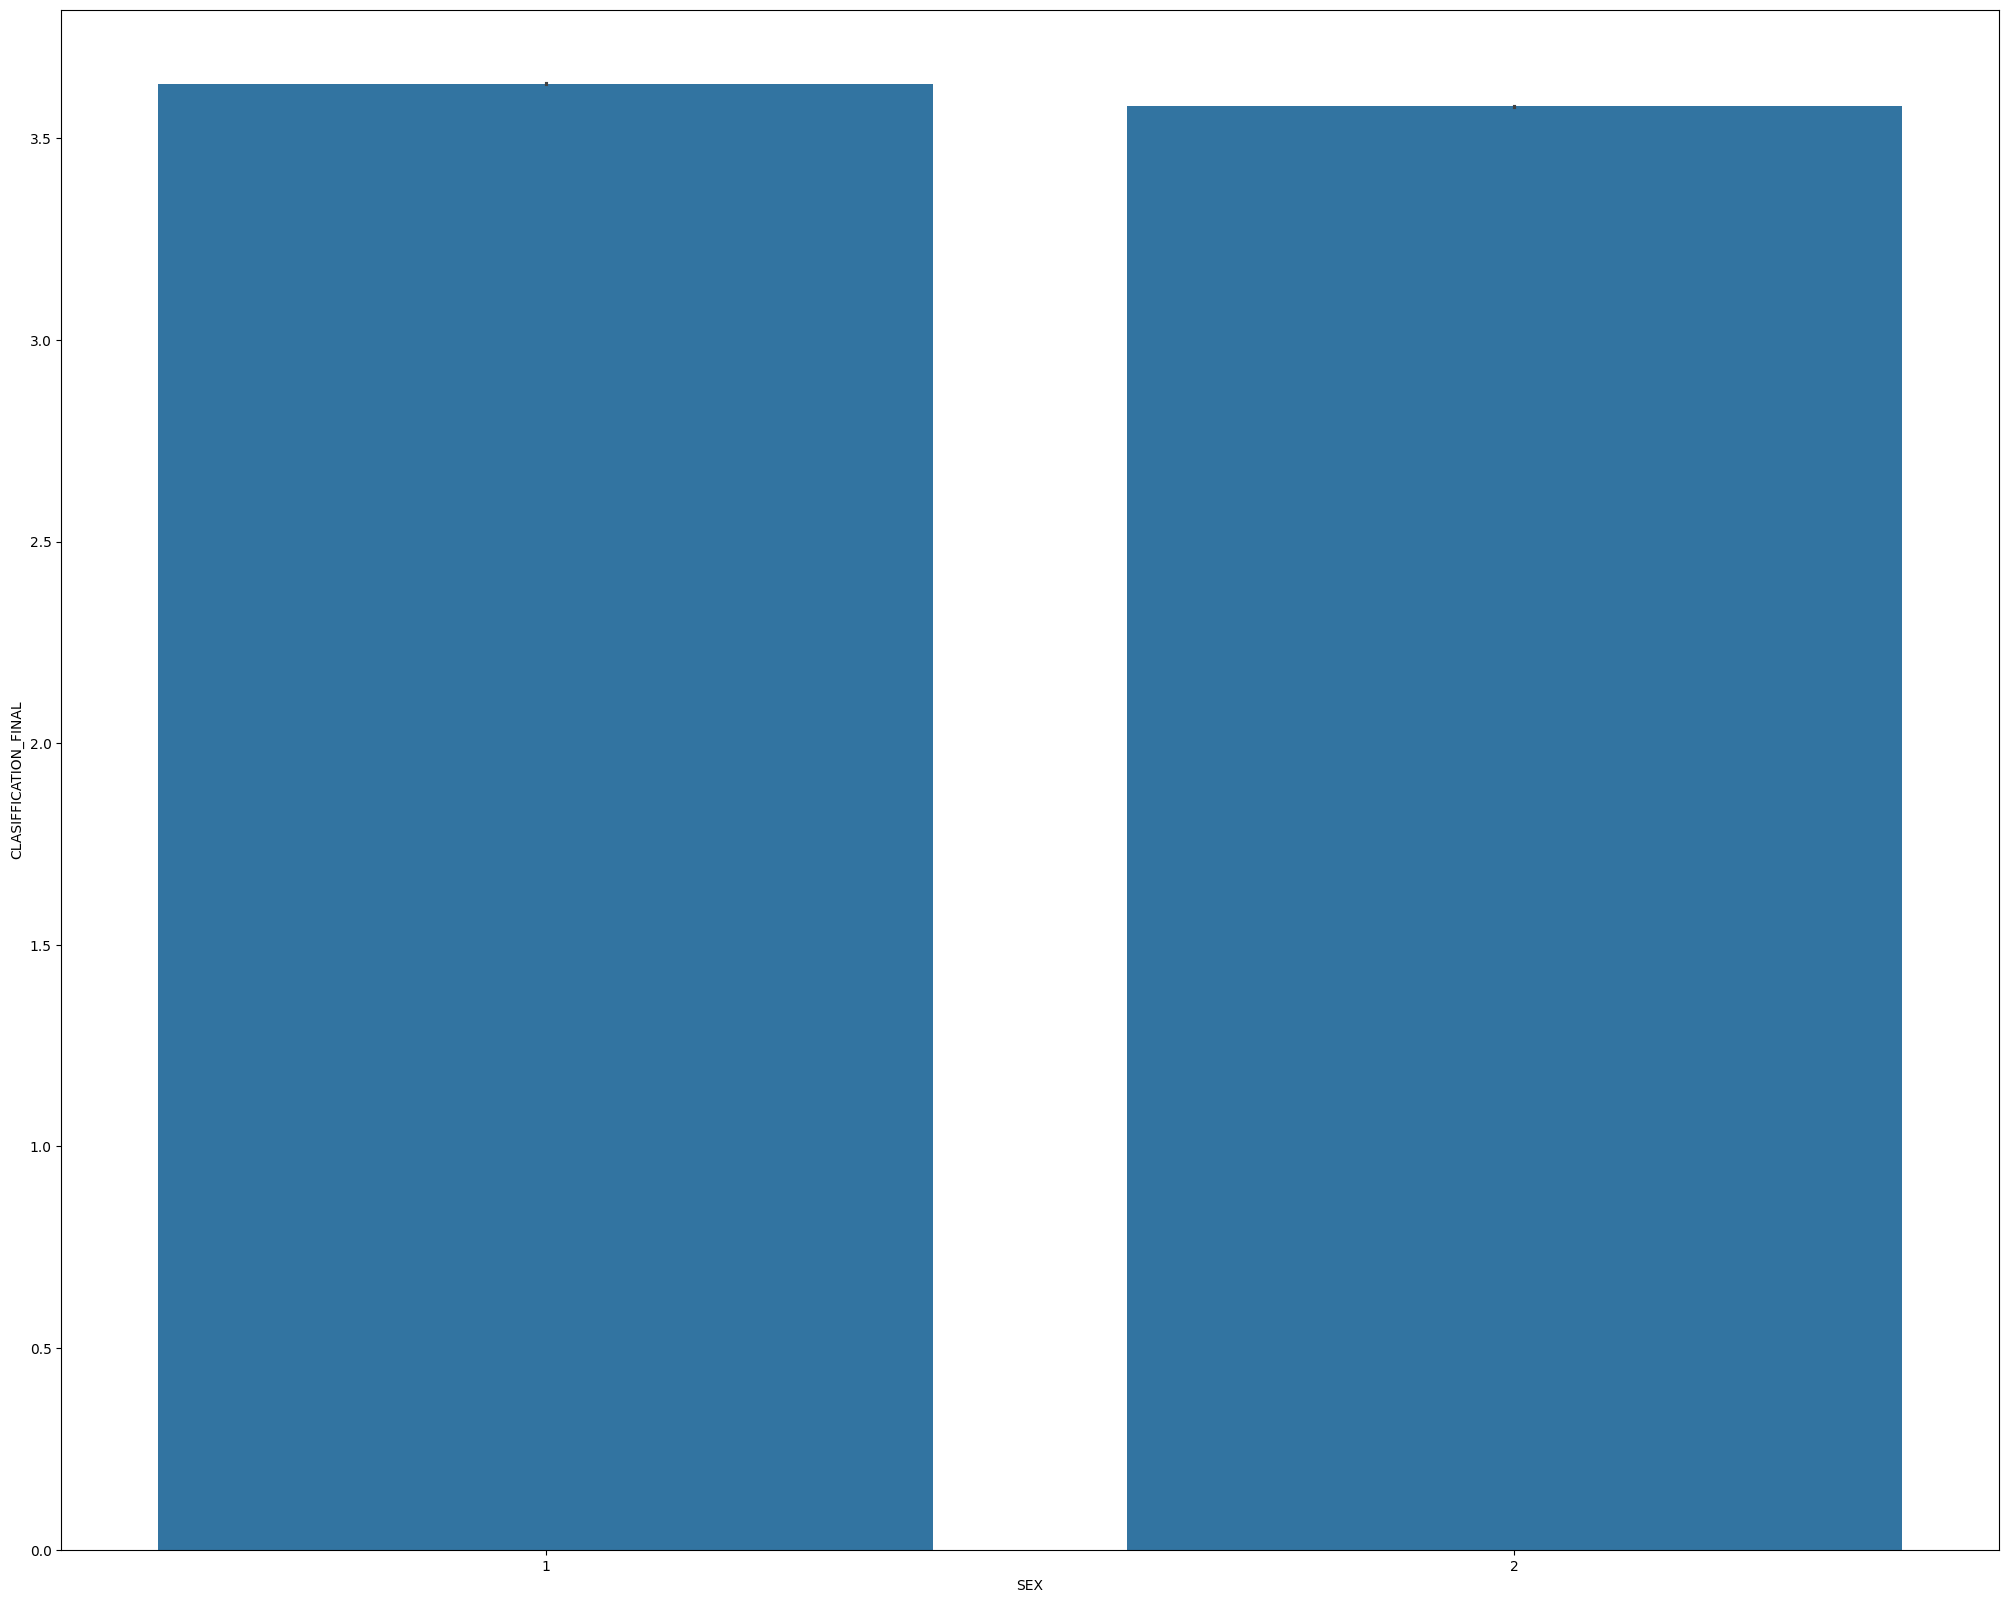

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='SEX',y='CLASIFFICATION_FINAL',data=data,)

<Axes: xlabel='PATIENT_TYPE', ylabel='CLASIFFICATION_FINAL'>

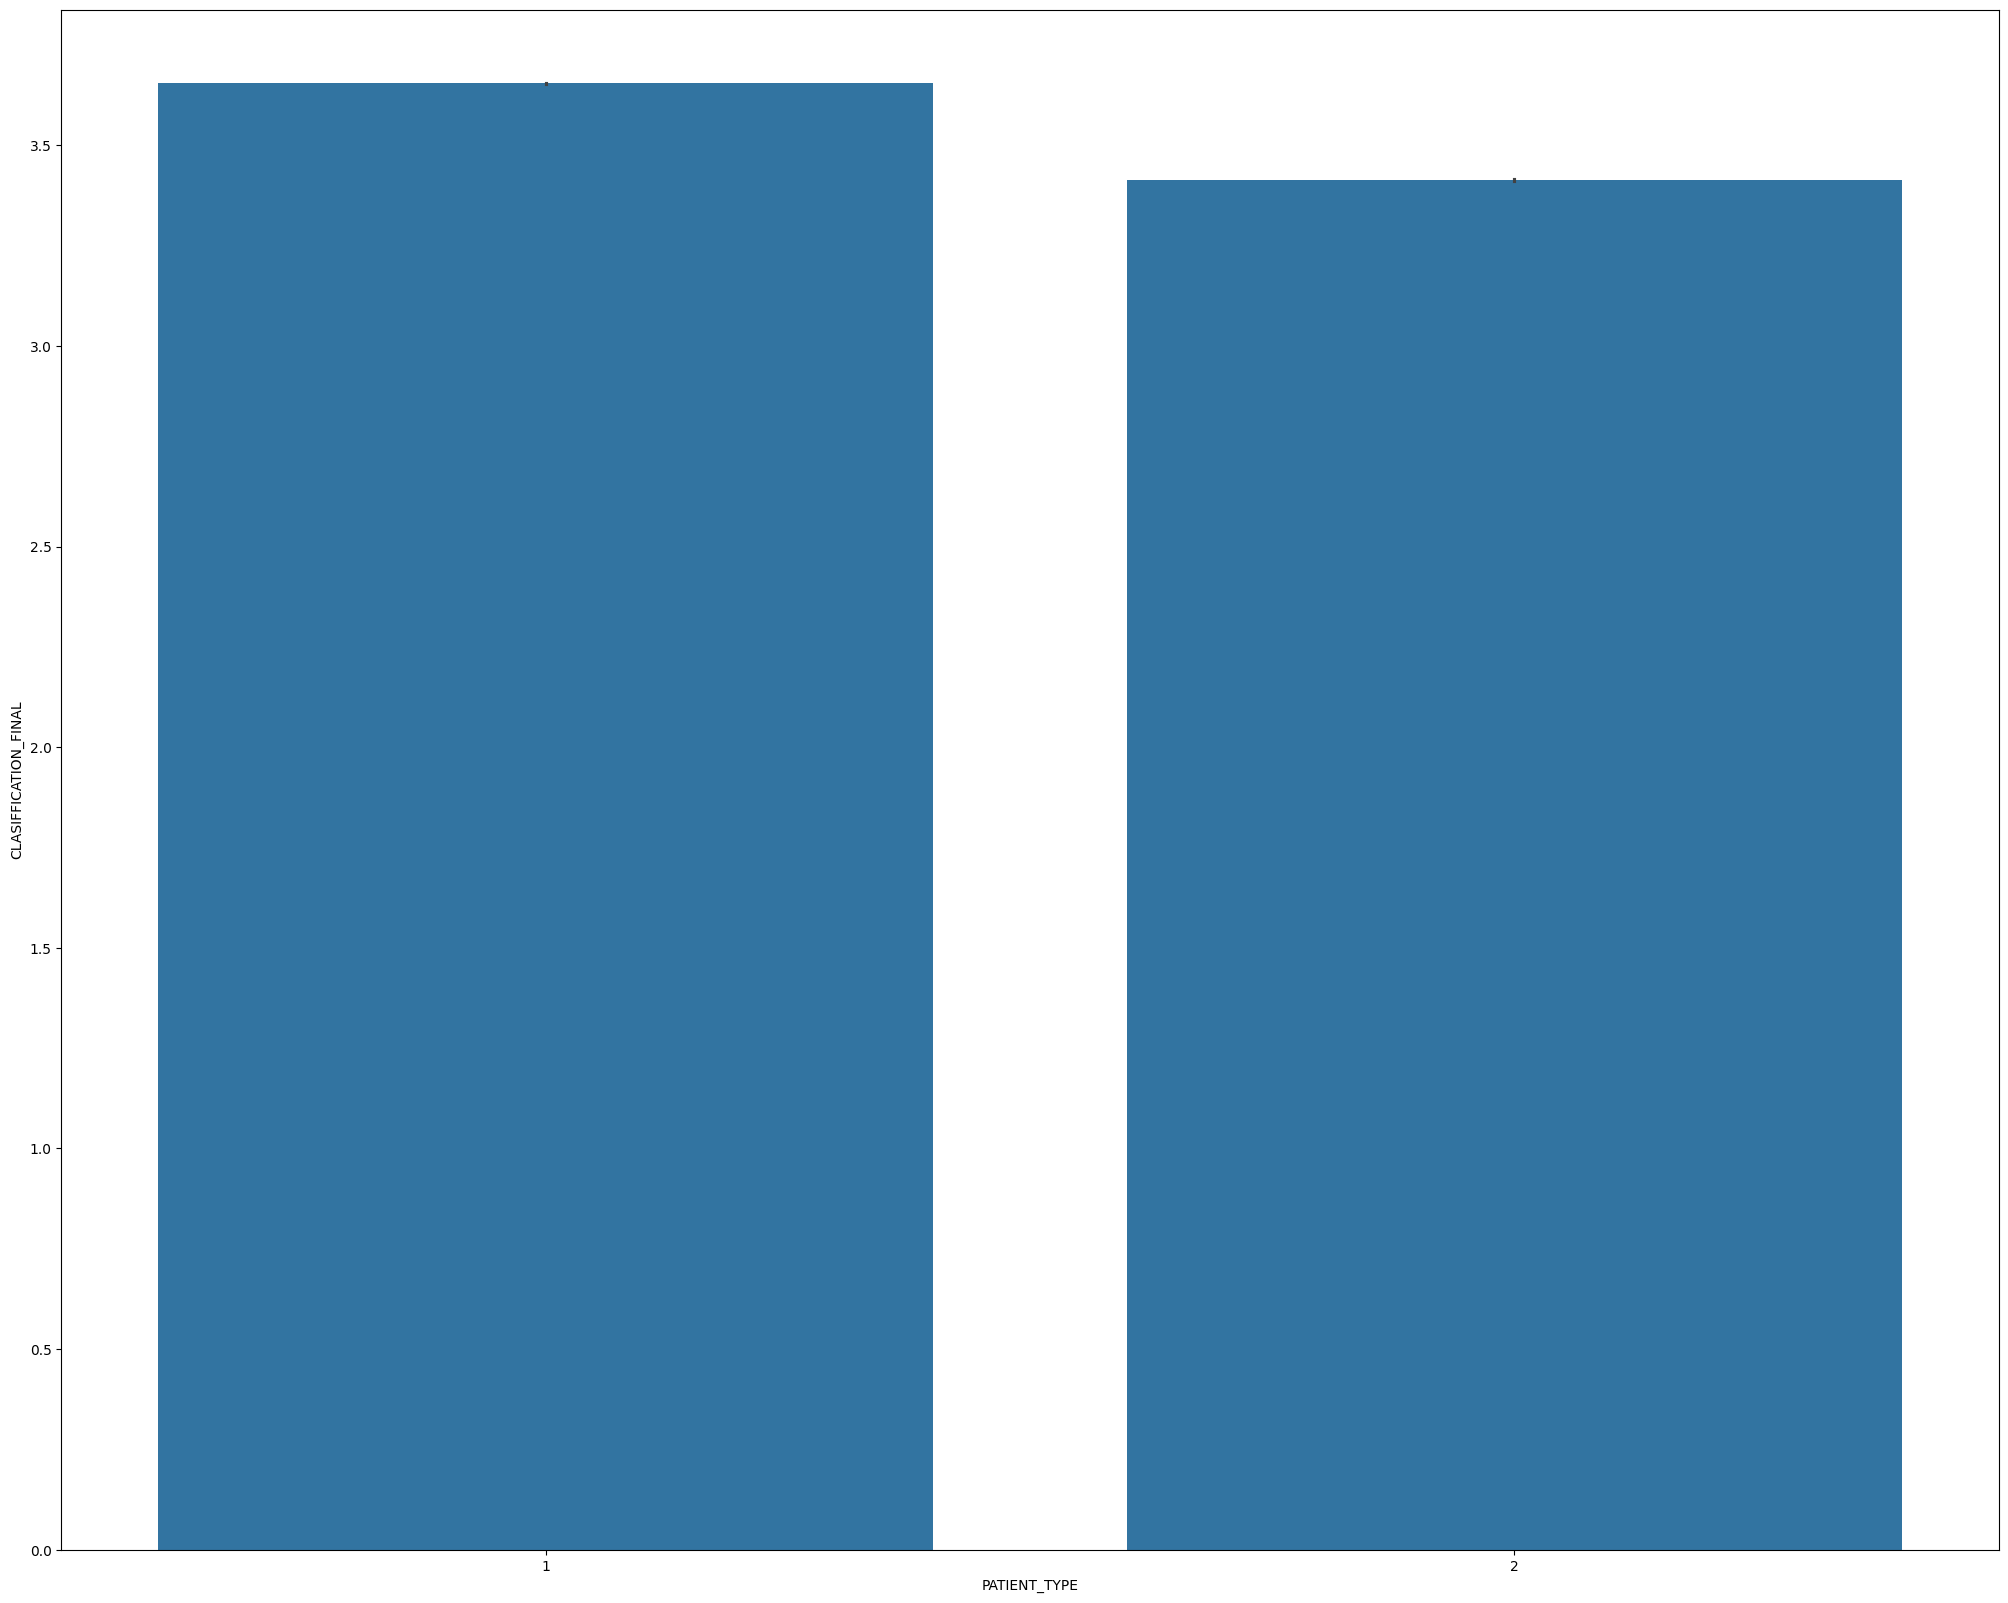

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='PATIENT_TYPE',y='CLASIFFICATION_FINAL',data=data)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='PNEUMONIA',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='PREGNANT',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='DIABETES',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='COPD',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='ASTHMA',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='INMSUPR',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='HIPERTENSION',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='CARDIOVASCULAR',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='RENAL_CHRONIC',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='OTHER_DISEASE',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='OBESITY',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='TOBACCO',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='USMER',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='INTUBED',y='CLASIFFICATION_FINAL',data=data,)

In [ ]:
plt.figure(figsize=(25,20))
sns.barplot(x='ICU',y='CLASIFFICATION_FINAL',data=data,)

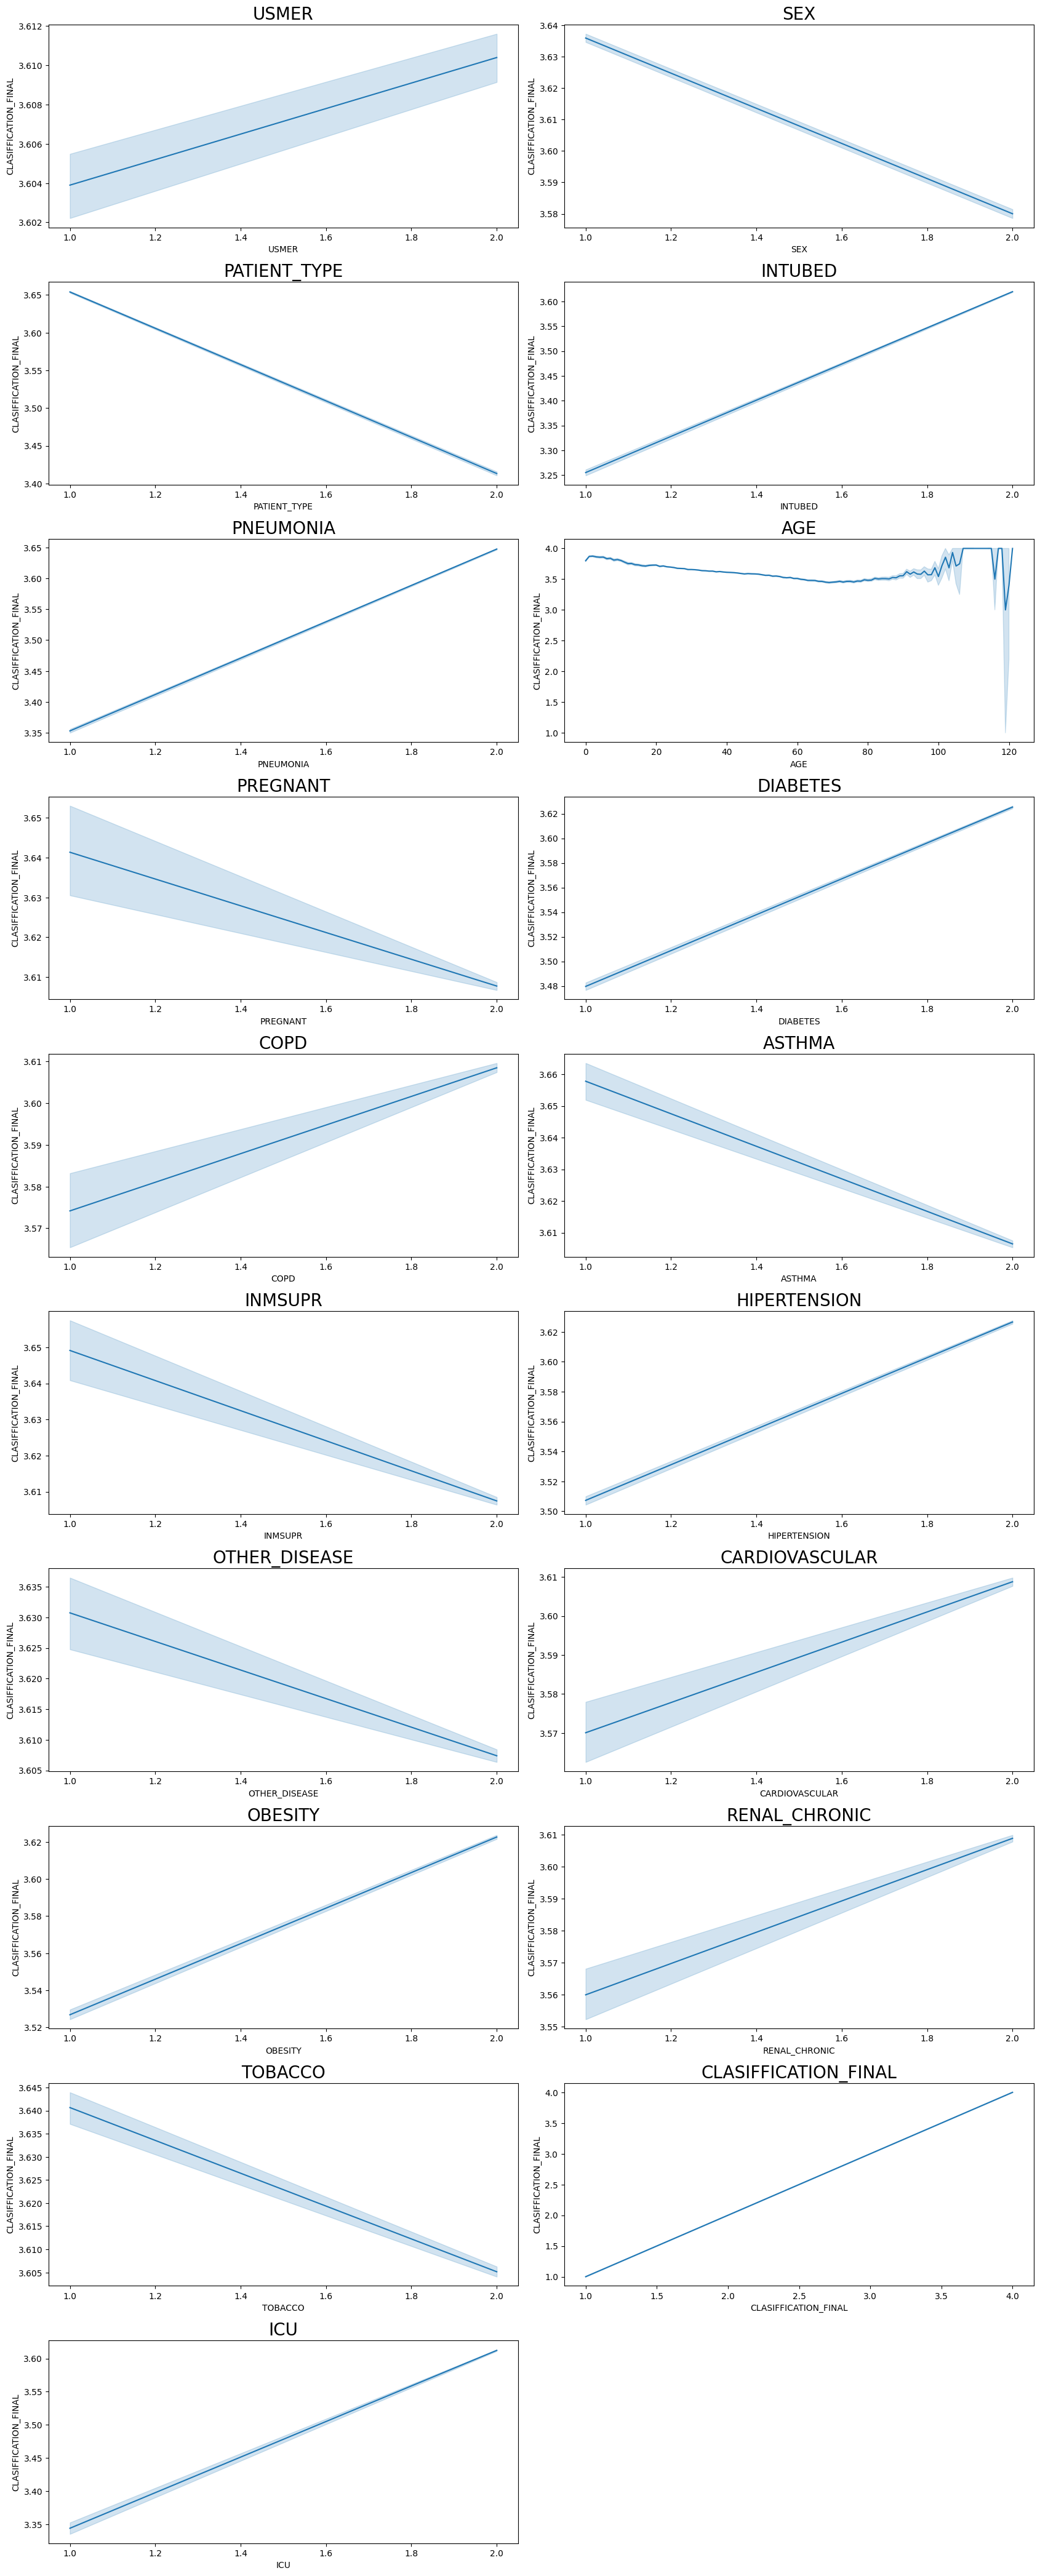

In [ ]:
plt.figure(figsize=(17,75))

for i in range(len(num_cols)):
  plt.subplot(18,2,i+1)
  sns.lineplot(x=num_cols[i],y=data['CLASIFFICATION_FINAL'],data=data)
  plt.tight_layout()
  plt.title(num_cols[i],fontsize=20)

plt.show()

In [ ]:
'''data_enc= data.copy()
sns.pairplot(data_enc)
plt.show() '''

In [ ]:
data_enc= data.copy()
plt.figure(figsize=(25,25))
sns.heatmap(data_enc.corr(),annot=True,cmap="coolwarm")

START BUILDING THE MODEL AFTER VARIABLE ANALYSIS


In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
#define X and Y variables for RandomForest model
X= data.drop(['CLASIFFICATION_FINAL','DATE_DIED'],axis=1)
y=data[['CLASIFFICATION_FINAL']]

In [ ]:
print(X.shape)
print(y.shape)

(1048575, 18)
(1048575, 1)


In [ ]:
X.head()

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
0,2,1,1,2.0,1.0,65,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2,2,1,2.0,1.0,72,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
2,2,2,2,1.0,2.0,55,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2,1,1,2.0,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2,2,1,2.0,2.0,68,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
#X['DATE_DIED']= X['DATE_DIED'].astype('object')
X['USMER']= X['USMER'].astype('object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train.head(2)

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU
408561,2,2,1,2.0,2.0,62,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
70143,2,2,1,2.0,2.0,57,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(838860, 18)
(838860, 1)
(209715, 18)
(209715, 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.impute import SimpleImputer

linearregression = LinearRegression()
linearregression.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Intercept: ",linearregression.intercept_)
print("\nCoeffs: ", linearregression.coef_)


Intercept:  [4.1241163]

Coeffs:  [[-0.03302387 -0.0389107  -0.09750438  0.14161715  0.16453854 -0.00276158
   0.03032741  0.02792318 -0.10349311 -0.03279411 -0.09578136  0.0056588
  -0.06101671 -0.06087658  0.06993995 -0.07179909 -0.05122686 -0.0347691 ]]


In [ ]:
y_pred= linearregression.predict(X_test)

In [ ]:
mse= mean_absolute_error(y_test,y_pred)
print(mse)

0.4598995526421991


In [ ]:
msqe= mean_squared_error(y_test,y_pred) **.5
print(msqe)

0.5232064787274107


In [ ]:
r2_score(y_test,y_pred)

0.05529206890130678

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size= 0.3,random_state=42)
X_train1= sm.add_constant(X_train1)
X_test1 = sm.add_constant(X_test1)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(734002, 19)
(734002, 1)
(314573, 19)
(314573, 1)


In [ ]:
y_train1= y_train1.astype(float)
X_train1= X_train1.astype(float)
olsmod1= sm.OLS(y_train1,X_train1)
olsres1= olsmod1.fit()
print(olsres1.summary())

                             OLS Regression Results                             
Dep. Variable:     CLASIFFICATION_FINAL   R-squared:                       0.057
Model:                              OLS   Adj. R-squared:                  0.057
Method:                   Least Squares   F-statistic:                     2445.
Date:                  Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                          02:05:52   Log-Likelihood:            -5.6805e+05
No. Observations:                734002   AIC:                         1.136e+06
Df Residuals:                    733983   BIC:                         1.136e+06
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.125

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1=pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns)
print('Before feature Selection: \n\n{}\n'.format(vif_series1))


NameError: name 'pd' is not defined

In [ ]:
#drop highest vif values and adjust r^2
X_train2 = X_train1.drop('PATIENT_TYPE',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Before Feature Selection , after removing PATIENT TYPE: \n\n{}\n'.format(vif_series2))

In [ ]:
olsmod2= sm.OLS(y_train1,X_train2)
olsres2=olsmod2.fit()
print(olsres2.summary())

We conclude that there is no multicolinearity  because there is no such column in olsres1 that has a VIF score that is greater than 5, infact all of them are less than 2.

In [ ]:
residual = olsres1.resid
np.mean(residual)

We also see that the mean oof residuals is very close to 0

In [ ]:
residual=olsres1.resid
fitted=olsres1.fittedvalues

In [ ]:
'''sns.set_style("whitegrid")
sns.residplot(fitted)
plt.xlabel("fitted vals")
plt.ylabel("resid")
plt.title("resid plt")
plt.show()
'''


ValueError: need at least one array to concatenate

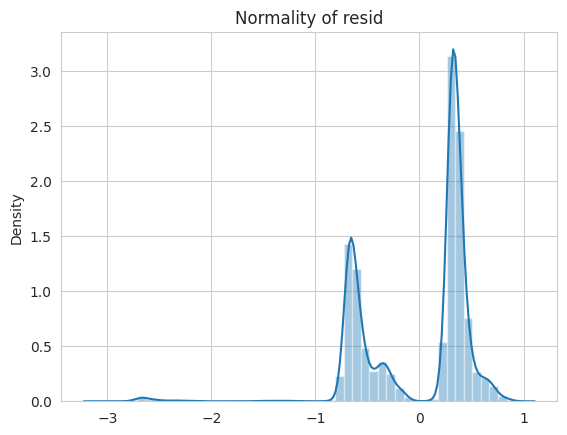

In [ ]:
sns.distplot(residual)
plt.title('Normality of resid')
plt.show()

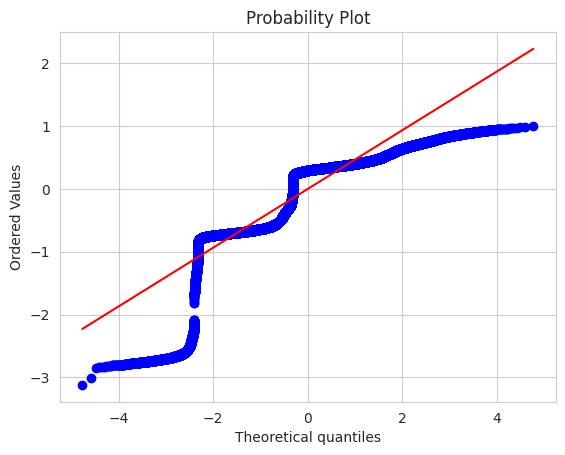

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residual, dist="norm",plot=pylab)
plt.show()

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic','p-value']
test = sms.het_goldfeldquandt(residual,X_train1)
lzip(name,test)

[('F statistic', 1.000988552919186), ('p-value', 0.38236327623847804)]

In [ ]:
y_pred_final = olsres1.predict(X_test1)

In [ ]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train1,fitted))
print('rmse for training dataset: ',rms)

rms1 = np.sqrt(mean_squared_error(y_test1,y_pred_final))
print('rmse for test dataset: ', rms1)

rmse for training dataset:  0.5246479361030233
rmse for test dataset:  0.52304902545513


In [ ]:
mae = mean_absolute_error(y_train1,fitted)
print('MAE for Training Dataset: ', mae)

mae1 = mean_absolute_error(y_test1,y_pred_final)
print('MAE for Test Dataset:', mae1)

MAE for Training Dataset:  0.4602279422464383
MAE for Test Dataset: 0.45977390682516694


In [ ]:
olsmod1 = sm.OLS(y_train1,X_train1)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                             OLS Regression Results                             
Dep. Variable:     CLASIFFICATION_FINAL   R-squared:                       0.057
Model:                              OLS   Adj. R-squared:                  0.057
Method:                   Least Squares   F-statistic:                     2445.
Date:                  Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                          02:33:03   Log-Likelihood:            -5.6805e+05
No. Observations:                734002   AIC:                         1.136e+06
Df Residuals:                    733983   BIC:                         1.136e+06
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.125